<a href="https://colab.research.google.com/github/aruna1206/OIBSIP_DataScience_Task2/blob/main/spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



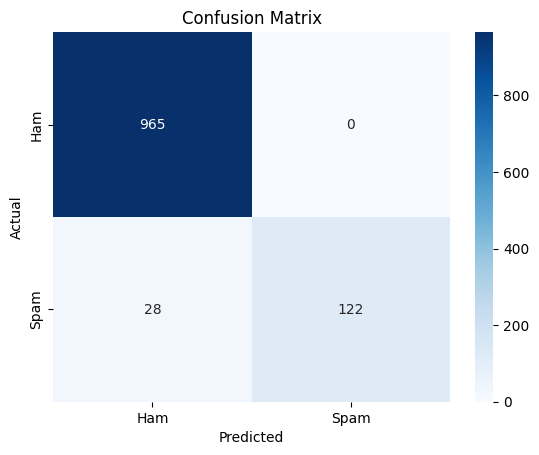

Prediction: Spam
✅ Model and Vectorizer saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import string, re, pickle

df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df = df.dropna()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['message'] = df['message'].apply(clean_text)

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

test_email = ["Congratulations! You have won a $1,000 Walmart gift card. Click here to claim now."]
test_email_vec = vectorizer.transform(test_email)
prediction = model.predict(test_email_vec)
print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")

pickle.dump(model, open("spam_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
print("✅ Model and Vectorizer saved successfully!")
